## DATA 690 Homework 4 (100 points - Due on Tuesday, October 3, 2023 by 11:59 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb.

The name of the file should be as follows:

    Lastname_Firstname_Homework4.pdf (example: Thomas_Sunela_Homework4.pdf)
   **AND**
   
    Lastname_Firstname_Homework4.ipynb (example: Thomas_Sunela_Homework4.ipynb.
    
In short, you are submitting the python notebook as well as the pdf of that notebook.
Do **NOT** submit .html file, the system will give you an error.

    
**Incorrect file name will cost you points!<br>**

Instructions for converting a Jupyter Python notebook to PDF:
                                        
    Go to the menu and choose, File --> Download As --> html.
    Open that html file and print it to PDF.
    Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.


**Things to note:**

* Each cell should display an output
* Use both Markdown and code comments in the Jupyter Notebook as needed

### IF YOU ARE MAKING ANY ASSUMPTIONS, WRITE THAT IN A MARKDOWN CELL OR COMMENT
### $\color{red}{\text{Answer the questions asked as well, not just code}}$. Answer the questions asked in a separate markdown cell



In this Homework assignment, you will be using techniques you learned to clean-up and analyze the data. A survey was performed to collect various body measurements and characteristics from a sample of individuals.

Why does the data need to be cleaned? In spite of the clear instructions given, it seems that some of the responses provided can't possibly be right. Many data scientists will tell you that easily more than 50% of your time is spent cleaning, preparing, and validating data. This activity will give you an opportunity to turn the messy survey responses into a useful data set from which you can extract meaningful insights.

The data has been loaded for you in the cell below.

In [85]:
# Import libraries and data

import pandas as pd
%matplotlib inline


from google.colab import files


uploaded = files.upload()


import io

body_data = pd.read_csv('class_survey_body_measurements.csv')

col_names = ['timestamp', 'sex', 'handspan', 'height',
             'shoe_size','hair_color', 'mother_height', 'mother_shoe_size',
             'mother_hair_color', 'father_height', 'father_shoe_size',
             'father_hair_color','athlete','shoulder_width','skull_circum']
body_data.columns = col_names
body_data.head()

Saving class_survey_body_measurements.csv to class_survey_body_measurements (2).csv


,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum
0,9/20/2018 12:21,Male,7.75,NaN,9.5,Black,63.0,7.0,Brown,69.0,10.5,Black,No,18.00,22.25
1,9/20/2018 18:43,Male,8.50,67.00,8.5,Blonde,62.0,6.0,Brown,74.0,11.0,Blonde,Yes,16.00,24.00
2,9/20/2018 18:53,Female,7.00,62.00,7.0,Black,61.0,6.0,Black,65.0,9.0,Black,Yes,15.00,22.00
3,9/20/2018 20:13,Male,8.00,68.25,9.0,Brown,58.0,NaN,Blonde,70.0,10.0,Black,No,17.25,21.75
4,9/20/2018 20:31,NaN,10.00,71.00,11.0,Black,NaN,9.0,Black,NaN,11.0,Black,No,19.00,22.00


### Problem 1: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot of `height` (y-axis) versus `handspan` (x-axis). What do you think of the plot?</span>

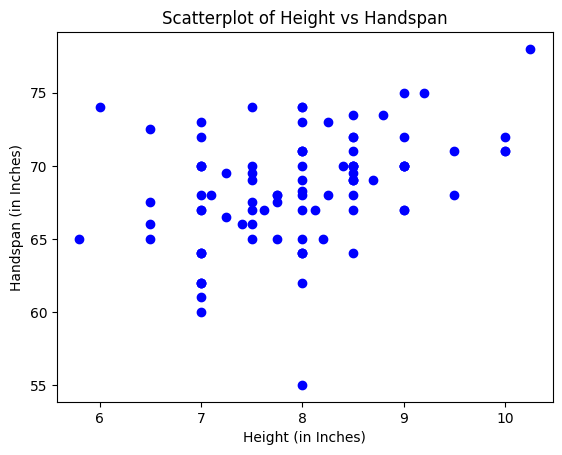

In [94]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

body_data.columns = col_names

plt.scatter(body_data['handspan'],
            body_data['height'],
            marker='o',
            color='b',
            label='Height vs Handspan')


plt.xlabel('Height (in Inches)')
plt.ylabel('Handspan (in Inches)')
plt.title('Scatterplot of Height vs Handspan')

plt.show()

#### Written Answer: I think the plot is strange because it is displaying the data such as the heights are from 6 - 10 inches but their handspan is ranging from 55 - 80 inches.

### Problem 2: (3 points)

<span  style="color:purple; font-size:16px">Set observations where `handspan` is greater than 30 or less than 4 to be missing using `pd.np.nan`. (Hint: Create a Boolean filter for the observations you want to remove. Extract the index for these observations and then using the `.loc[]` method, set the `handspan` values for these observations to `pd.np.nan`, the Numpy value that represents missing values.</span>

In [89]:
# Answer
import pandas as pd
import numpy as np

body_data.columns = col_names

filter = (body_data['handspan'] > 30) | (body_data['handspan'] < 4)

body_data.loc[filter, 'handspan'] = np.nan

print(body_data['handspan'])


0       7.75
1       8.50
2       7.00
3       8.00
4      10.00
       ...  
97      7.50
98      9.20
99      8.80
100     8.20
101     8.50
Name: handspan, Length: 102, dtype: float64


### Problem 3: (3 points)

<span  style="color:purple; font-size:16px">Re-create the scatterplot of `height` (x-axis) versus `handspan` (y-axis) now that you have removed the problem observations. Describe the resulting relationship between an individual's `handspan` and their `height`. Make sure to address the form, strength, and direction of the relationship.</span>

0       7.75
1       8.50
2       7.00
3       8.00
4      10.00
       ...  
97      7.50
98      9.20
99      8.80
100     8.20
101     8.50
Name: handspan, Length: 102, dtype: float64


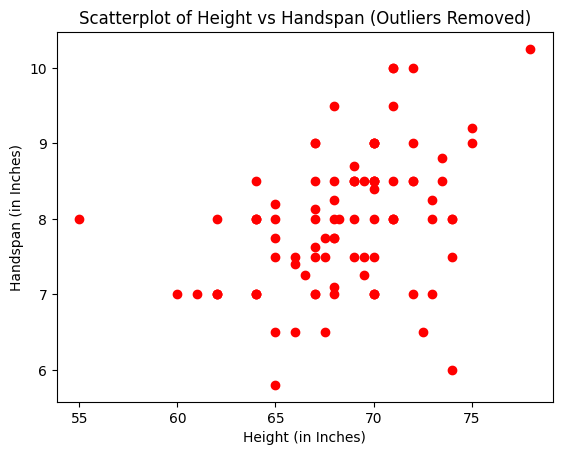

In [96]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

body_data.columns = col_names

filter = (body_data['handspan'] > 30) | (body_data['handspan'] < 4)

body_data.loc[filter, 'handspan'] = np.nan

print(body_data['handspan'])

plt.scatter(body_data['height'],
            body_data['handspan'],
            marker='o',
            color='r',
            label='Height vs Handspan')

plt.xlabel('Height (in Inches)')
plt.ylabel('Handspan (in Inches)')
plt.title('Scatterplot of Height vs Handspan (Outliers Removed)')

plt.show()

#### Written Response: The form of the data looks like there is a slight linear pattern but a lot of variability can be seen. The slight linear pattern shows that the strength of the relationship between height and handspan is moderate. The direction is positive which means that as the height increases, so does the handspan.



### Problem 4: (3 points)

<span  style="color:purple; font-size:16px">Import the Seaborn library and the `regplot()` function to fit a line of best fit through the data to describe the relationship between `handspan` and `height`. You are going to explore seaborn library with the skillset that you have acquired thus far.</span>

Text(0.5, 1.0, 'Scatterplot of Height vs Handspan w/ Regression Line')

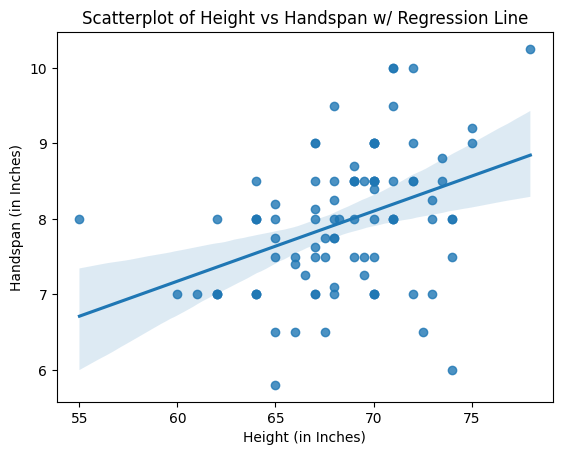

In [104]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

body_data.columns = col_names

sns.regplot(x='height', y='handspan', data=body_data)

plt.xlabel('Height (in Inches)')
plt.ylabel('Handspan (in Inches)')
plt.title('Scatterplot of Height vs Handspan w/ Regression Line')


### Problem 5: (3 points)

<span  style="color:purple; font-size:16px">Using the `regplot` output above, what is the approximate average height of a person with a `handspan` of 6 inches? What is the approximate height of a person with a `handspan` of 10 inches? (Note: you do not need to perform any calculations or write any code to answer this question.)</span>

#### Written Answer

##### Approximate height when handspan 6 inches: about 70 inches


##### Approximate height when handspan 10 inches: about 75 inches


### Problem 6: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot matrix of `height`, `shoe_size`, and `handspan`. What relationship is the strongest? What relationship is the weakest?</span>

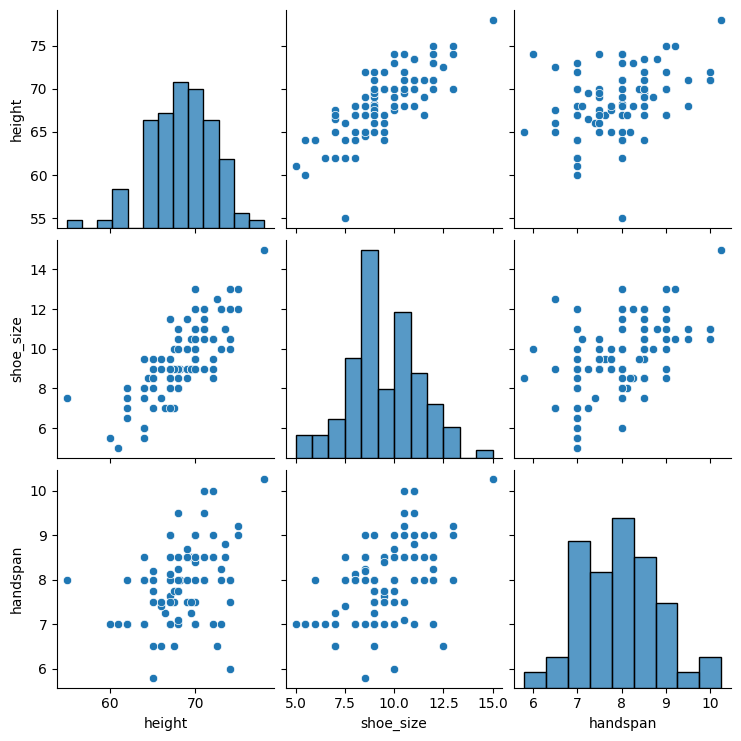

In [59]:
# Answer - create plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

body_data.columns = col_names

sns.pairplot(body_data[['height', 'shoe_size', 'handspan']])

#### Written Answer: The strongest relationship is shoe_size and height. The strength is very high because as shoe size increases, the height increases. The weakest relationship is handspan and height. The data is scattered all over and there doesn't seems to be a proper direction or any strength of the data points.



### Problem 7: (4 points)

<span  style="color:purple; font-size:16px">Great! So far, you have successfully used visualization to locate suspect values and handle them appropriately. But, there are other issues with data. Create a scatterplot matrix of the entire data and determine at least two variables that appear to have suspect values. Make sure to address why the values must be incorrect. (Hint: try using Seaborn's `pairplot()` for a better looking and easier to read plot!)</span>

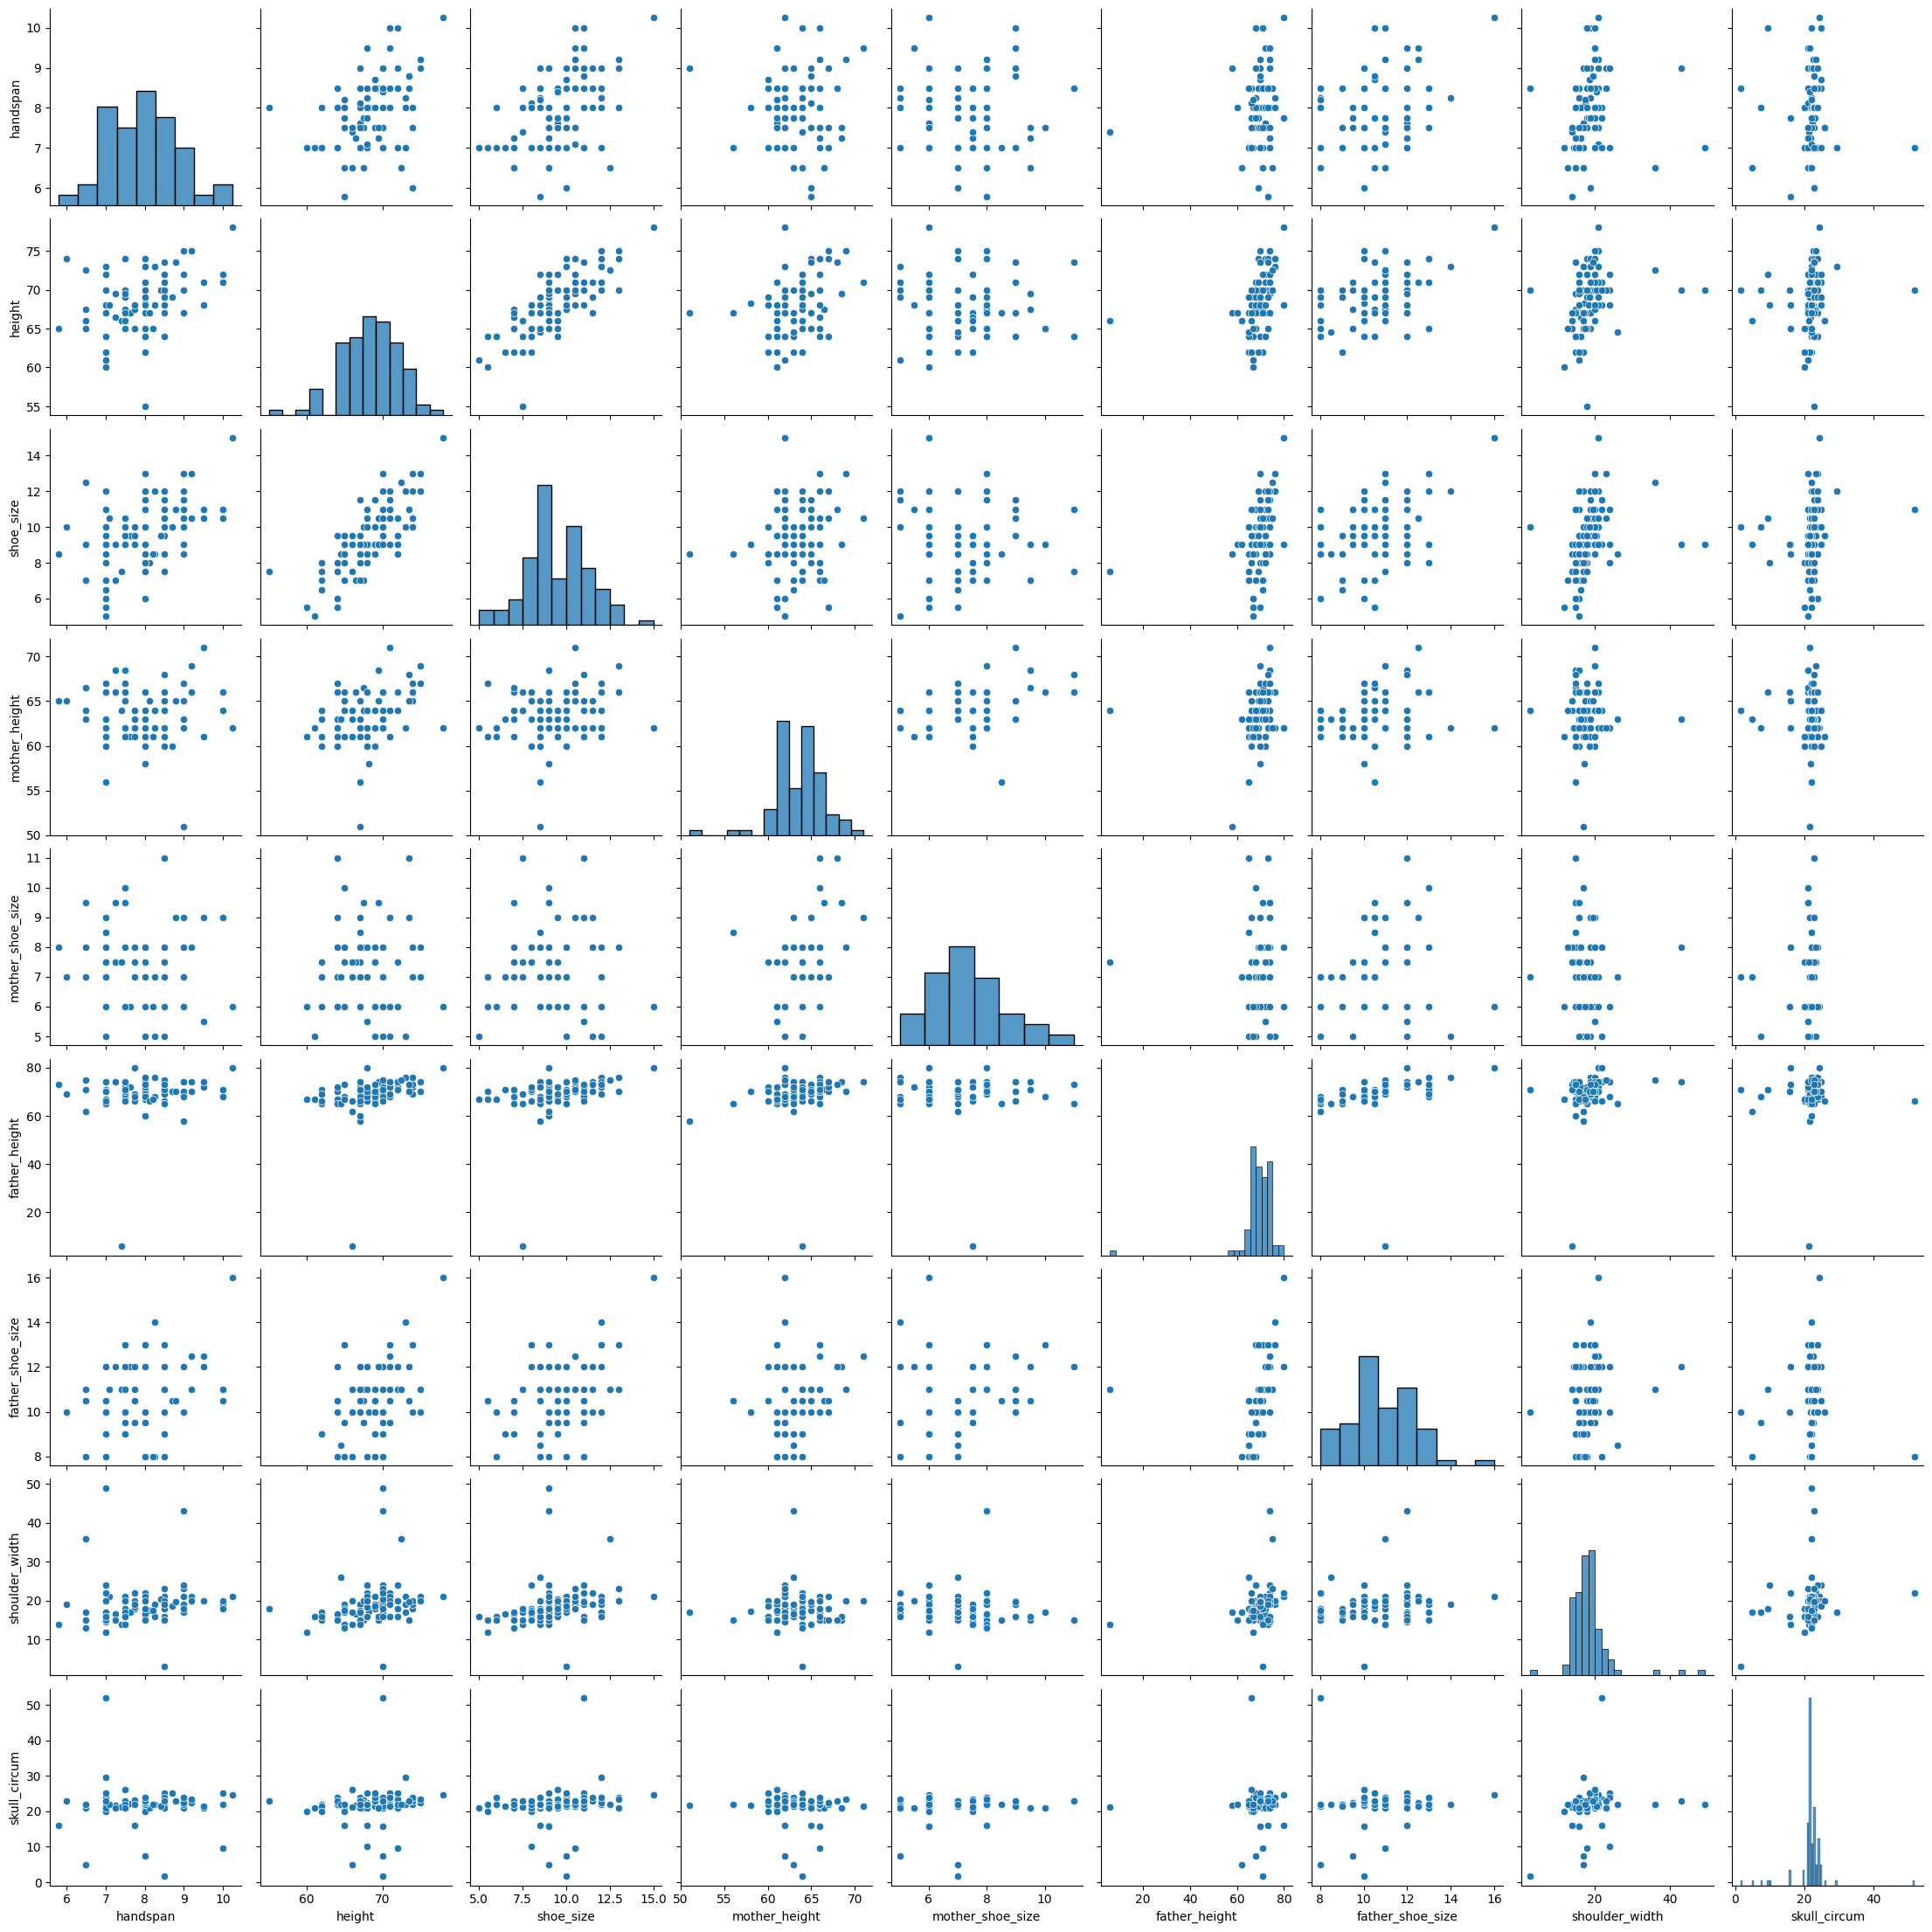

In [60]:
# Answer

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

body_data.columns = col_names
sns.pairplot(body_data)


**Answer:**

Variables with issues: The shoe size and skull circumference

Why you know the values must not be right: There is no correlation between the two variables because they are not related.


### Problem 8: (3 points)

<span  style="color:purple; font-size:16px">The survey, when asking information about the respondent's `sex`, allowed for people to respond: *Male*, *Female*, or *Prefer not to say*. How many observations were there for each level of `sex`?</span>

In [61]:
# Answer
body_data.columns = col_names
number_of_sex = body_data['sex'].value_counts()

# Display the counts
print(number_of_sex)

Male                 70
Female               27
Prefer not to say     1
Name: sex, dtype: int64


### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">Because there are very few who `prefer not to say`, permanently remove them from the data using the `drop(index = XXXX)` method. Take appropriate steps to verify that these observations have been removed.</span>

In [105]:
# Answer
body_data.columns = col_names
indices_to_remove = body_data[body_data['sex'] == 'Prefer not to say'].index

body_data.drop(indices_to_remove, inplace=True)

print(body_data['sex'].value_counts())

Male      70
Female    27
Name: sex, dtype: int64


### Problem 10: (5 points)

<span  style="color:purple; font-size:16px">Create a DataFrame called `avg_heights` containing 3 columns, 1.) the average `height` (by `sex` and `shoe_size`), 2.)`sex`, and 3.) `shoe_size`. Print out the DataFrame. (Hint: use `groupby()` and deal with the index appropriately.)</span>

In [106]:
# Answer
import pandas as pd

body_data.columns = col_names

avg_heights = body_data.groupby(['sex', 'shoe_size'])['height'].mean().reset_index()

print(avg_heights)

       sex  shoe_size     height
0   Female        5.5  62.000000
1   Female        6.0  64.000000
2   Female        6.5  62.000000
3   Female        7.0  65.250000
4   Female        7.5  61.750000
5   Female        8.0  64.666667
6   Female        8.5  67.125000
7   Female        9.0  67.600000
8   Female        9.5  64.000000
9   Female       10.0  67.500000
10    Male        7.0  67.000000
11    Male        8.0  66.200000
12    Male        8.5  67.333333
13    Male        9.0  68.977273
14    Male        9.5  68.571429
15    Male       10.0  70.200000
16    Male       10.5  70.928571
17    Male       11.0  71.000000
18    Male       11.5  69.000000
19    Male       12.0  72.428571
20    Male       12.5  72.500000
21    Male       13.0  72.500000
22    Male       15.0  78.000000


### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Create a plot using Seaborn's `pairplot()` on the `avg_heights` data, setting the `hue = sex`. Describe what you see.</span>

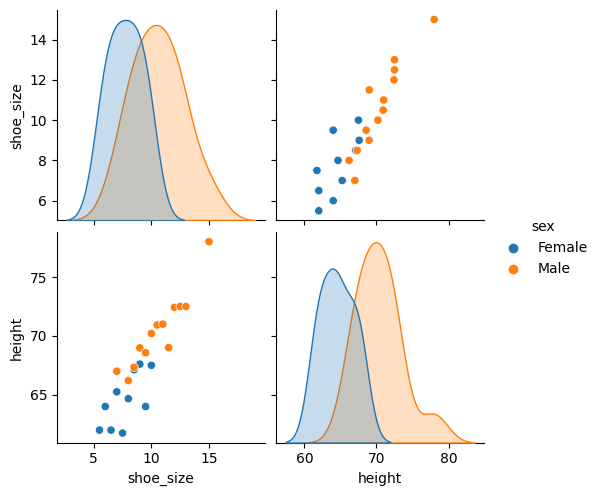

In [67]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

body_data.columns = col_names

avg_heights = body_data.groupby(['sex', 'shoe_size'])['height'].mean().reset_index()
sns.pairplot(data=avg_heights, hue='sex')

plt.show()

#### Written Answer: It is safe to conclude that as a group, males tend to be taller and have bigger shoe sizes than females. As the shoe size is increasing, their height is increasing, and vice versa. Men tend to have shoe sizes from about 8 to 15. Women have shoe sizes 5 to 10.


### Problem 12: (5 points)

<span  style="color:purple; font-size:16px">Use the plot to determine a reasonable rule for defining a cutoff for `height` and `shoe_size` that might be useful in determining if an individual is male or female. Can your rules perfectly predict `sex` based on `height` and `shoe_size`? (Example: If `height` is less than XXX and `shoe_size is less than XXX then I would predict the individual to be XXX. Answers may vary.)</span>

#### Written Answer: My rule is that if the height is less than 68 inches and shoe size is less than 10, then I would predict the person to be a female. For a male, I would say that the height is less than 80 inches and shoe size is less than 15. However, you cannot **perfectly** predict sex based on height and shoe_size.



### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">Use `pivot_table()` with the `body_data` to create a DataFrame with `shoe_size` as the index, `sex` as the columns, and the `height` as the values with `mean` as the aggregation function.</span>

In [70]:
# Answer
import pandas as pd

body_data.columns = col_names

pivot_table = pd.pivot_table(body_data,
                             values='height',
                             index='shoe_size',
                             columns='sex',
                             aggfunc='mean')
print(pivot_table)

sex           Female       Male
shoe_size                      
5.5        62.000000        NaN
6.0        64.000000        NaN
6.5        62.000000        NaN
7.0        65.250000  67.000000
7.5        61.750000        NaN
8.0        64.666667  66.200000
8.5        67.125000  67.333333
9.0        67.600000  68.977273
9.5        64.000000  68.571429
10.0       67.500000  70.200000
10.5             NaN  70.928571
11.0             NaN  71.000000
11.5             NaN  69.000000
12.0             NaN  72.428571
12.5             NaN  72.500000
13.0             NaN  72.500000
15.0             NaN  78.000000


#### Written Answer


### Problem 14: (5 points)

<span  style="color:purple; font-size:16px">Create one overlapping density plot of `height` by `sex` and `athlete`. (Hint: use `groupby()` on both grouping variables.) Make sure to include a legend. Describe the relationship between `sex`, `athlete`, and `height`. How does your interpretation relate to your answers to the previous few problems?</span>

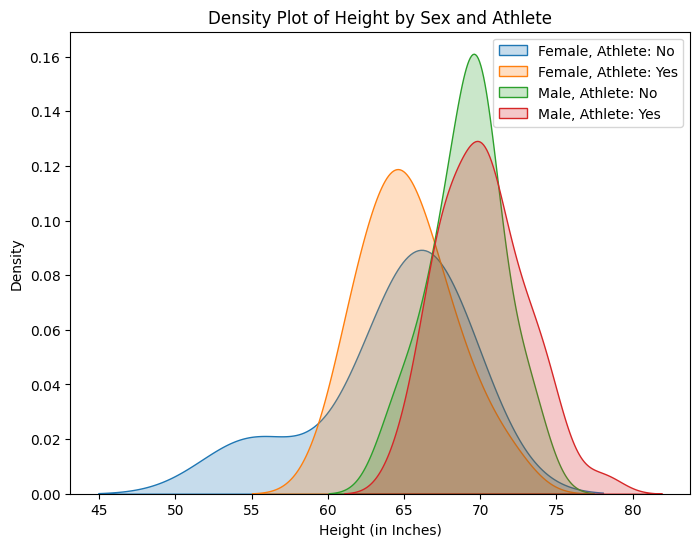

In [107]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

body_data.columns = col_names

grouped = body_data.groupby(['sex', 'athlete'])

plt.figure(figsize=(8, 6))

for (sex, athlete), group_data in grouped:
    sns.kdeplot(data=group_data['height'], label=f'{sex}, Athlete: {athlete}', fill=True)


plt.xlabel('Height (in Inches)')
plt.ylabel('Density')
plt.title('Density Plot of Height by Sex and Athlete')
plt.legend()

plt.show()

#### Written Answer: It looks like the density of height is very different between males and females. The difference is even more drastic between those who are athletes and not athletes.


### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Determine if there are missing values in the data. If so, in what columns? How many missing values are there?</span>

In [111]:
# Answer
import pandas as pd

body_data.columns = col_names
missing_values = body_data.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing_values)

total_missing_values = missing_values.sum()
print("Total number of missing values:", total_missing_values)

Columns with missing values:
sex                  4
handspan             6
height               3
mother_height       22
mother_shoe_size    38
father_height       18
father_shoe_size    31
dtype: int64
Total number of missing values: 122


### Problem 16: (5 points)

<span  style="color:purple; font-size:16px">There appears to be some missing values in the `sex` column. We want to impute values for these missing observations. Using the `height` for each of the individuals, determine the probability that the person was male or female. This question works in conjunction with an earlier problem, so refer to the visualization you created there for guidance.</span>

+ Extract the data corresponding to each of the missing values of `sex`.
+ Calculate the proportion of Males and Females taller than or equal to each of heights of the missing observations

Determine proportion of Males and Females with heights above _67__.

In [123]:
import pandas as pd

body_data.columns = col_names
missing_sex_data = body_data[body_data['sex'].isnull()]
height_threshold = 67  #I got this by looking at the density graph

males_above_threshold = len(body_data[(body_data['sex'] == 'Male') & (body_data['height'] > height_threshold)]) / len(body_data[body_data['sex'] == 'Male'])

females_above_threshold = len(body_data[(body_data['sex'] == 'Female') & (body_data['height'] > height_threshold)]) / len(body_data[body_data['sex'] == 'Female'])

print(f"Proportion of males above {height_threshold} inches: {males_above_threshold:.2f}")
print(f"Proportion of females above {height_threshold} inches: {females_above_threshold:.2f}")



Proportion of males above 67 inches: 0.77
Proportion of females above 67 inches: 0.22


Determine proportion of Males and Females with heights below _67__.



In [133]:
import pandas as pd

body_data.columns = col_names
height_threshold = 67 #I got this by looking at the density graph

males_below_threshold = len(body_data[(body_data['sex'] == 'Male') & (body_data['height'] < height_threshold)]) / len(body_data[body_data['sex'] == 'Male'])
females_below_threshold = len(body_data[(body_data['sex'] == 'Female') & (body_data['height'] < height_threshold)]) / len(body_data[body_data['sex'] == 'Female'])

print(f"Proportion of males below {height_threshold} inches: {males_below_threshold:.2f}")
print(f"Proportion of females below {height_threshold} inches: {females_below_threshold:.2f}")

Proportion of males below 67 inches: 0.08
Proportion of females below 67 inches: 0.63


### Problem 17: (5 points)

<span  style="color:purple; font-size:16px">Based on what you learned from the last exercise, impute the missing values of `sex`.</span>

In [130]:
# Answer - Create filter and impute for male bodies
import pandas as pd

body_data.columns = col_names
height_threshold = 67  #I got this by looking at the density graph

# Create a filter to identify missing values for male individuals
male_missing_filter = (body_data['sex'].isnull()) & (body_data['height'] >= height_threshold)

# Impute missing values in 'sex' as 'Male' for male individuals
body_data.loc[male_missing_filter, 'sex'] = 'Male'


In [135]:
# Answer - Create filter and impute for female bodies
import pandas as pd

body_data.columns = col_names
height_threshold = 67  #I got this by looking at the density graph

# Create a filter to identify missing values for male individuals
female_missing_filter = (body_data['sex'].isnull()) & (body_data['height'] >= height_threshold)

# Impute missing values in 'sex' as 'Male' for male individuals
body_data.loc[male_missing_filter, 'sex'] = 'Female'

In [138]:
# Answer - Verify success by checking for missing values of sex
body_data.columns = col_names

missing_sex_count = body_data['sex'].isnull().sum()

if missing_sex_count == 0:
    print("There are NO missing values.")
else:
    print(f"There are {missing_sex_count} missing values.")


There are 2 missing values.


### Problem 18: (5 points)

<span  style="color:purple; font-size:16px">Plot a time-series plot of the responses by `timestamp` by calling the `plot()` method on the `timestamp` column extracted as a Series. Provide a suitable title and make the plot large. Interpret what you are seeing in the plot. How do you explain the stair-step shape? (Hint: The index will be displayed on the x-axis and the timestamp on the y-axis)</span>

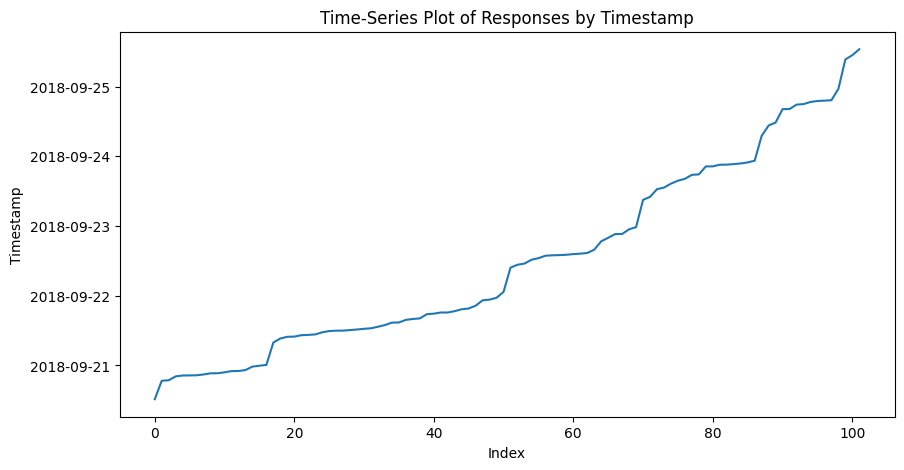

In [77]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

body_data.columns = col_names

body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])

plt.figure(figsize=(10, 5))
body_data['timestamp'].plot()

plt.title('Time-Series Plot of Responses by Timestamp')
plt.xlabel('Index')
plt.ylabel('Timestamp')

plt.show()

#### Written Answer: The stair-step shape comes from the variation of the time interval data points. I think each step represents the specific responses which can be seen over time.  


### Problem 19: (5 points)

<span  style="color:purple; font-size:16px">Determine the days of the week of the responses as recorded by the `timestamp` and save these values as a new column in the data called `DOW`.</span>

In [78]:
# Answer
import pandas as pd
body_data.columns = col_names

body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])
body_data['DOW'] = body_data['timestamp'].dt.day_name()

print(body_data['DOW'])

0      Thursday
1      Thursday
2      Thursday
3      Thursday
4      Thursday
         ...   
97       Monday
98       Monday
99      Tuesday
100     Tuesday
101     Tuesday
Name: DOW, Length: 101, dtype: object


#### Written Answer


### Problem 20: (5 points)

<span  style="color:purple; font-size:16px">Create a visualization showing the number of survey submissions by the day of the week. What day had the most submissions? The least number of submissions?</span>

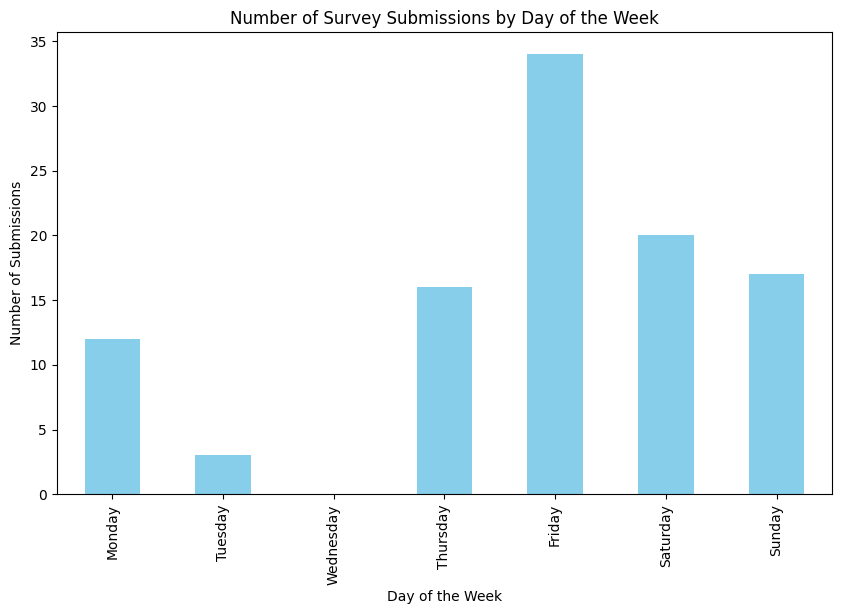

In [101]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("class_survey_body_measurements.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['DOW'] = df['Timestamp'].dt.day_name()


submission_counts = df['DOW'].value_counts()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
submission_counts = submission_counts.reindex(days_of_week)

plt.figure(figsize=(10, 6))
submission_counts.plot(kind='bar',
                       color='skyblue')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Submissions')
plt.title('Number of Survey Submissions by Day of the Week')

plt.show()


#### Written Answer: The day with most submissions is Friday. The day with the least submissions is Wednesday.


### Problem 21: (5 points)

<span  style="color:purple; font-size:16px">Set the `timestamp` column to be the index. Use the `resample()` method to aggregate the data in 3 hour intervals. Use the `agg()` function to apply the `count` method to the `sex` column. Finally, plot the time-series so we can visualize the number of responses submitted over each 3 hour interval. Describe any pattern that you see in the data.</span>

(Hint: After setting timestamp to be the index, use code like: `data.resample(<stuff>).agg(<stuff>).plot(<stuff>)`)

<Figure size 1200x600 with 0 Axes>

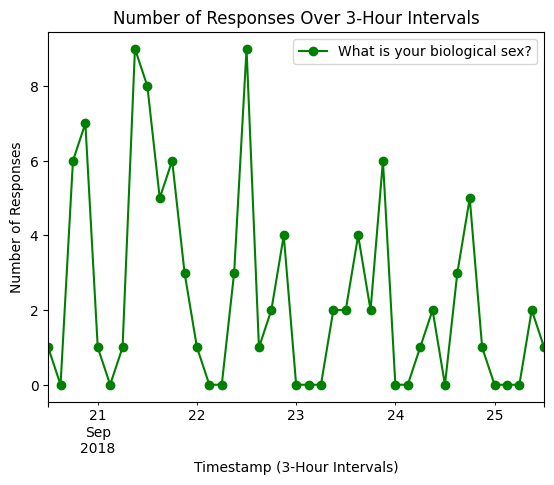

In [103]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("class_survey_body_measurements.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.set_index('Timestamp', inplace=True)

resampled_data = df.resample('3H').agg({'What is your biological sex?': 'count'})

plt.figure(figsize=(12, 6))
resampled_data.plot(kind='line',
                    marker='o',
                    color='green',
                    linestyle='-')

plt.xlabel('Timestamp (3-Hour Intervals)')
plt.ylabel('Number of Responses')
plt.title('Number of Responses Over 3-Hour Intervals')

plt.show()


#### Written Answer


### Problem 22: (5 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions on Sept 25. How many submissions were made on that day?</span>

In [45]:
# Answer
import pandas as pd

df = pd.read_csv("class_survey_body_measurements.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

submissions_sept_25 = df.loc['2018-09-25']
num_submissions_sept_25 = len(submissions_sept_25)

print(f"Number of submissions made on September 25th: {num_submissions_sept_25}")

Number of submissions made on September 25th: 3


#### Written Answer: 3 submissions


### Problem 23: (5 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions between 10AM and 2PM on September 21. How many submissions were made during that time?</span>

In [46]:
# Answer
import pandas as pd

df = pd.read_csv("class_survey_body_measurements.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
submissions_sept_21_10_to_2 = df['2018-09-21 10:00:00':'2018-09-21 14:00:00']
num_submissions_sept_21_10_to_2 = len(submissions_sept_21_10_to_2)

print(f"Number of submissions made between 10 AM and 2 PM on September 21st: {num_submissions_sept_21_10_to_2}")

Number of submissions made between 10 AM and 2 PM on September 21st: 13


#### Written Answer: 13 submissions
